In [2]:
%store -r import_all_libs

In [3]:
import_all_libs

In [173]:
train = pd.read_csv('/home/tuts/datasets/food_forecasting/train.csv')
fc = pd.read_csv('/home/tuts/datasets/food_forecasting/fulfilment_center_info.csv')
meal = pd.read_csv('/home/tuts/datasets/food_forecasting/meal_info.csv')

In [174]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [175]:
fc.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.70
1,13,590,56,TYPE_B,6.70
2,124,590,56,TYPE_C,4.00
3,66,648,34,TYPE_A,4.10
4,94,632,34,TYPE_C,3.60


In [176]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [177]:
meal.meal_id.nunique()

51

In [178]:
fc.center_id.nunique()

77

In [179]:
train.meal_id.nunique()

51

In [180]:
train.center_id.nunique()

77

In [181]:
train = pd.merge(train, meal, on='meal_id')
train = pd.merge(train, fc, on='center_id')

## Posed questions

- what week it sold more/less?
- how price varies along the weeks?


- what center has the toughest/easiest load?
- what center type has the toughest/easiest load?


- what meal sells more/less?
- what cuisine sells more/less?
- what category sells more/less?


- being featured on a homepage or being promoted influences sales?


- a specific region or city has more demand than others?



## Train exploration

In [74]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.00
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.00
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.00
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.00
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.00


In [14]:
print(f'Shape: {train.shape}')
print(f'Null values: {train.isna().sum().sum()}')
print(f'Available columns: {train.columns.values}')

Shape: (456548, 15)
Null values: 0
Available columns: ['id' 'week' 'center_id' 'meal_id' 'checkout_price' 'base_price'
 'emailer_for_promotion' 'homepage_featured' 'num_orders' 'category'
 'cuisine' 'city_code' 'region_code' 'center_type' 'op_area']


In [40]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00
mean,1250096.31,74.77,82.11,2024.34,332.24,354.16,0.08,0.11,261.87,601.55,56.61,4.08
std,144354.82,41.52,45.98,547.42,152.94,160.72,0.27,0.31,395.92,66.20,17.64,1.09
min,1000000.00,1.00,10.00,1062.00,2.97,55.35,0.00,0.00,13.00,456.00,23.00,0.90
25%,1124998.75,39.00,43.00,1558.00,228.95,243.50,0.00,0.00,54.00,553.00,34.00,3.60
50%,1250183.50,76.00,76.00,1993.00,296.82,310.46,0.00,0.00,136.00,596.00,56.00,4.00
75%,1375140.25,111.00,110.00,2539.00,445.23,458.87,0.00,0.00,324.00,651.00,77.00,4.50
max,1499999.00,145.00,186.00,2956.00,866.27,866.27,1.00,1.00,24299.00,713.00,93.00,7.00


In [54]:
def plot_counts(col, title):
    cats = col.value_counts()
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.bar(cats.index, cats.values);

### Plot counts

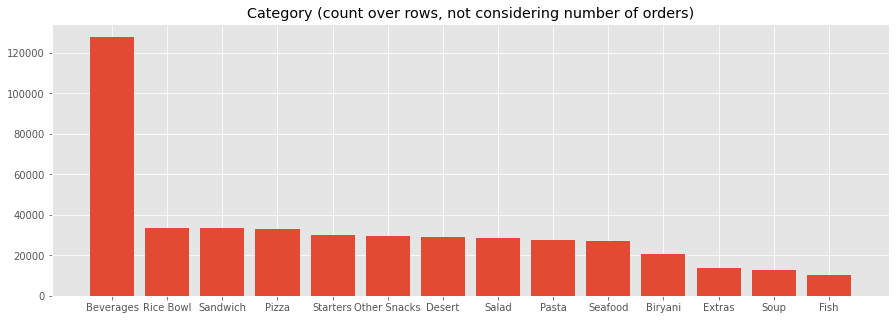

In [75]:
plot_counts(train.category, 'Category (count over rows, not considering number of orders)')

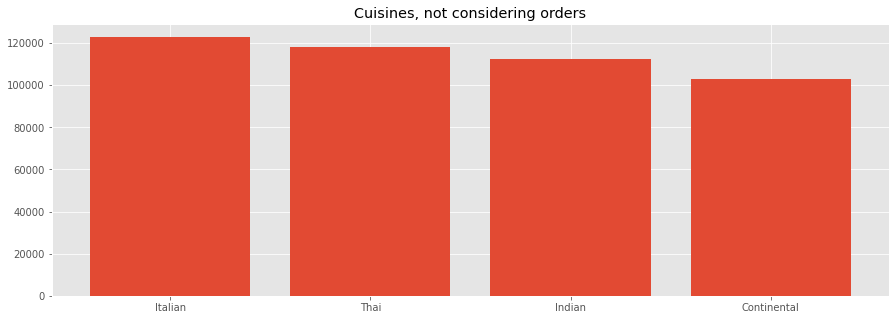

In [76]:
plot_counts(train.cuisine, 'Cuisines, not considering orders')

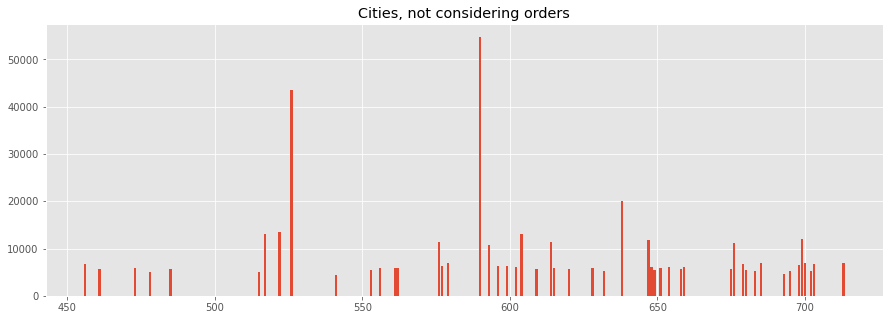

In [77]:
plot_counts(train.city_code, 'Cities, not considering orders')

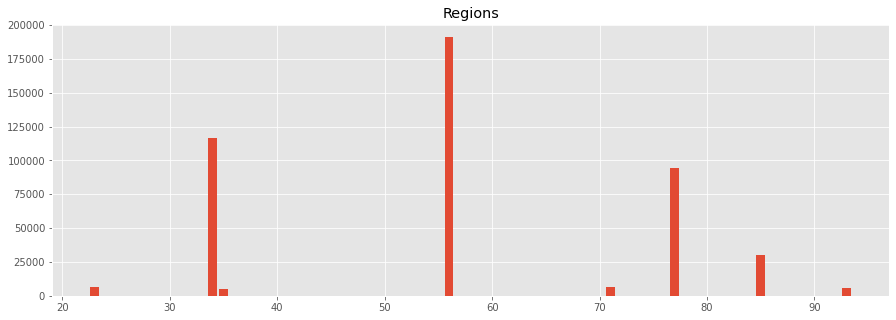

In [59]:
plot_counts(train.region_code, 'Regions')

### Uniqueness

In [16]:
print(f'Unique ids: {train.id.nunique()}')
print(f'Unique weeks: {train.week.nunique()}')
print(f'Unique FCs: {train.center_id.nunique()}')
print(f'Unique meals: {train.meal_id.nunique()}')

Unique ids: 456548
Unique weeks: 145
Unique FCs: 77
Unique meals: 51


In [17]:
def p90(x):
    return x.quantile(0.9)

week_gb = train[['week', 'checkout_price', 'base_price']].groupby(['week']).agg([p90, np.sum, np.mean])
week_gb.head()

checkout_price                  base_price                  
                p90       sum   mean        p90        sum   mean
week                                                             
1            582.03 965809.26 330.53     611.13 1018365.32 348.52
2            582.03 938092.43 323.93     611.13 1005779.20 347.30
3            611.13 948560.28 327.20     611.13 1008352.05 347.83
4            611.13 953833.69 330.16     611.13 1006446.90 348.37
5            486.03 901141.58 315.19     617.89 1001075.16 350.15

### Meal vs orders analysis

In [79]:
meal_gb = train[['meal_id', 'num_orders', 'city_code']].groupby(['meal_id']).agg([p90, np.sum, np.mean, np.count_nonzero])
meal_gb.head()

num_orders                               city_code                  \
               p90      sum   mean count_nonzero       p90      sum   mean   
meal_id                                                                      
1062        755.00  4712795 423.17         11137       695  6689207 600.63   
1109       1121.00  6367773 571.92         11134       695  6687409 600.63   
1198        526.00  1018280 242.10          4206       699  2569868 611.00   
1207        325.00  1800856 166.65         10806       695  6498256 601.36   
1216        108.00   533564  55.03          9695       695  5816174 599.91   

                       
        count_nonzero  
meal_id                
1062            11137  
1109            11134  
1198             4206  
1207            10806  
1216             9695

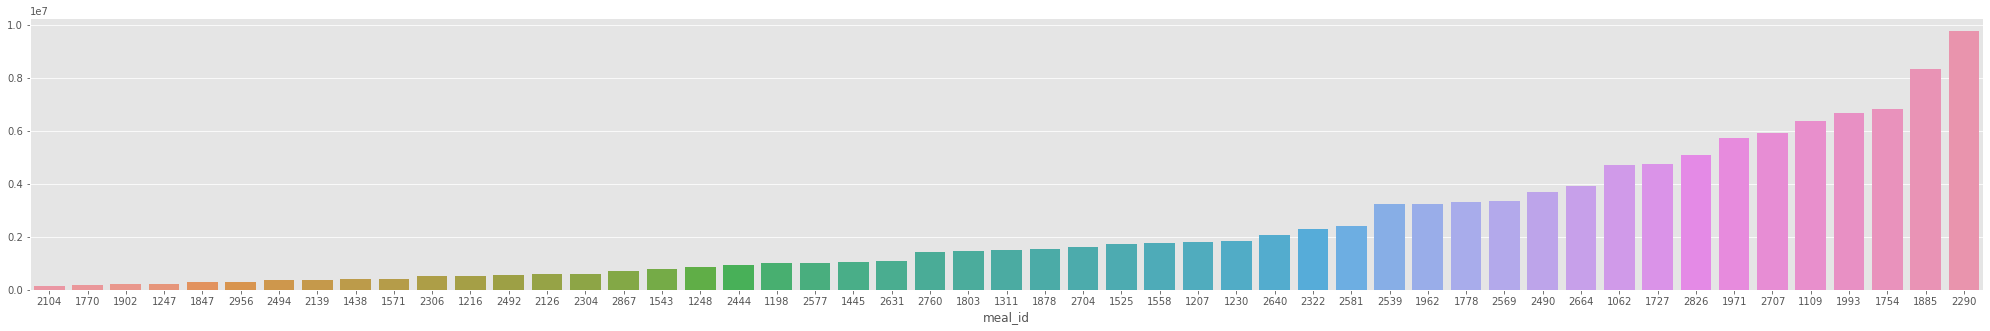

In [120]:
plt.figure(figsize=(35,5))

meal_vals = meal_gb['num_orders']['sum'].sort_values()

sns.barplot(x=meal_vals.index, y=meal_vals.values, order=meal_vals.index);

In [128]:
top_5_meals = meal_vals.nlargest().index
small_5_meals = meal_vals.nsmallest().index

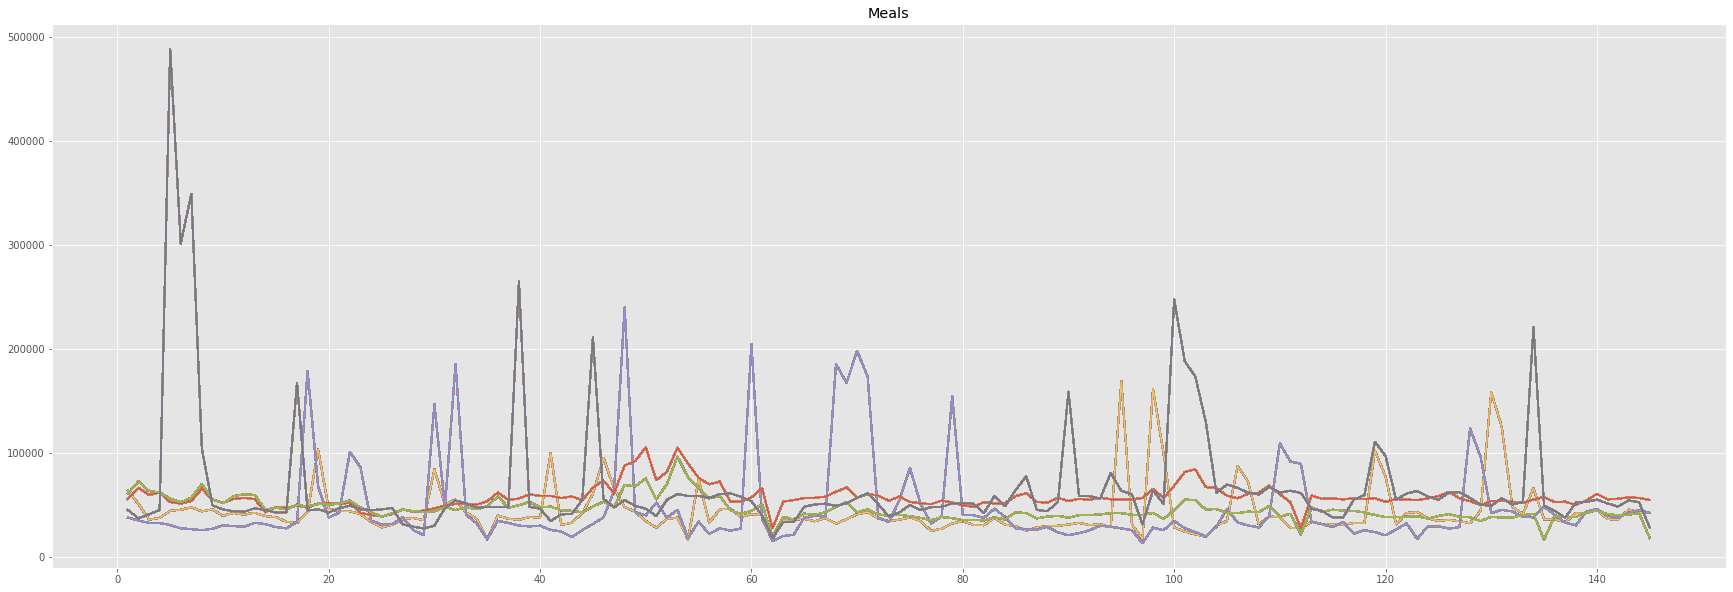

In [198]:
meal_week_gb = train[['meal_id', 'week', 'num_orders']].groupby(['meal_id','week']).sum()

# meal_week_gb.loc[1062]#['num_orders']['sum']

plt.figure(figsize=(30,10))
plt.title(f'Meals')
for m_w in meal_week_gb.index:
    meal = m_w[0]
    if meal in top_5_meals:
        meal_series = meal_week_gb.loc[meal]
        plt.plot(meal_series.index, meal_series.values);
# train[train.meal_id == 2290]

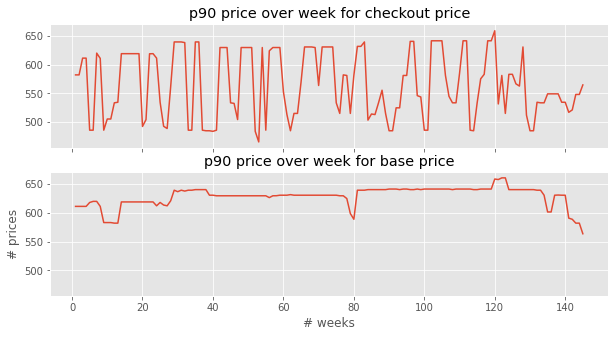

In [26]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,5))
axs[0].plot(week_gb.index, week_gb.checkout_price['p90'])
axs[0].set_title('p90 price over week for checkout price')
axs[1].plot(week_gb.index, week_gb.base_price['p90'])
axs[1].set_title('p90 price over week for base price')


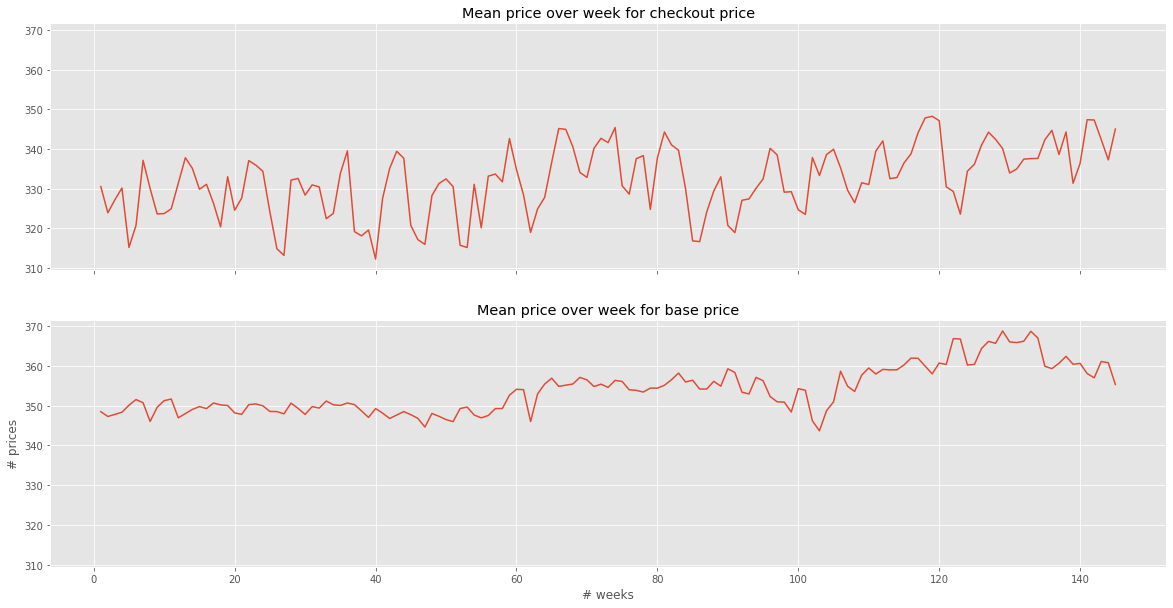

In [27]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))
axs[0].plot(week_gb.index, week_gb.checkout_price['mean'])
axs[0].set_title('Mean price over week for checkout price')
axs[1].plot(week_gb.index, week_gb.base_price['mean'])
axs[1].set_title('Mean price over week for base price')
plt.xlabel('# weeks')
plt.ylabel('# prices');

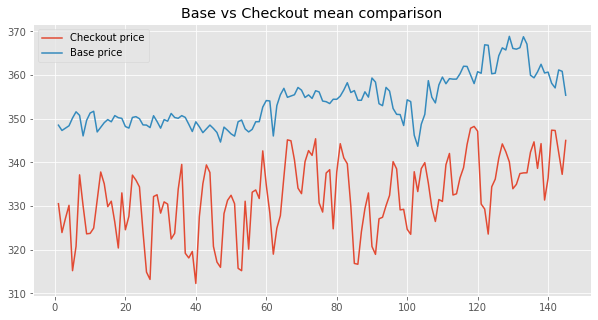

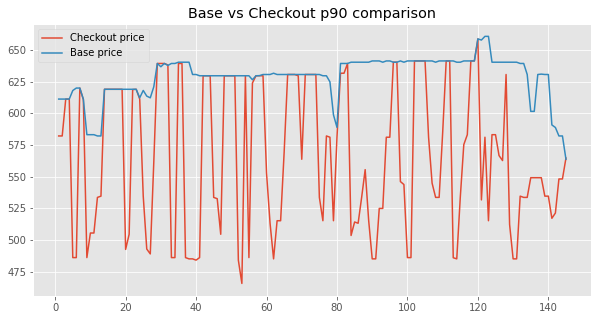

In [28]:
plt.figure(figsize=(10,5))
plt.title('Base vs Checkout mean comparison')
plt.plot(week_gb.index, week_gb.checkout_price['mean'], label='Checkout price')
plt.plot(week_gb.index, week_gb.base_price['mean'], label='Base price')
plt.legend()

plt.figure(figsize=(10,5))
plt.title('Base vs Checkout p90 comparison')
plt.plot(week_gb.index, week_gb.checkout_price['p90'], label='Checkout price')
plt.plot(week_gb.index, week_gb.base_price['p90'], label='Base price')
plt.legend();

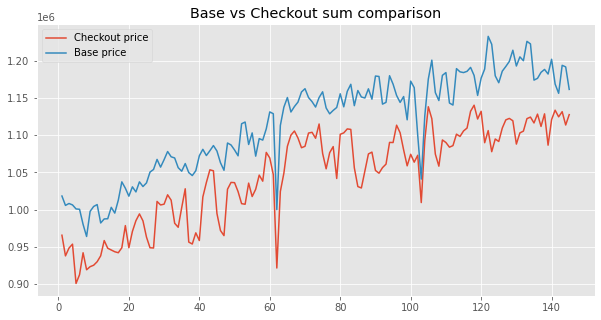

In [29]:
plt.figure(figsize=(10,5))
plt.title('Base vs Checkout sum comparison')
plt.plot(week_gb.index, week_gb.checkout_price['sum'], label='Checkout price')
plt.plot(week_gb.index, week_gb.base_price['sum'], label='Base price')
plt.legend();

In [ ]:
week_gb = train[['meal_id', 'checkout_price', 'base_price']].groupby(['week']).agg([p90, np.sum, np.mean])
week_gb.head()

## Correlations

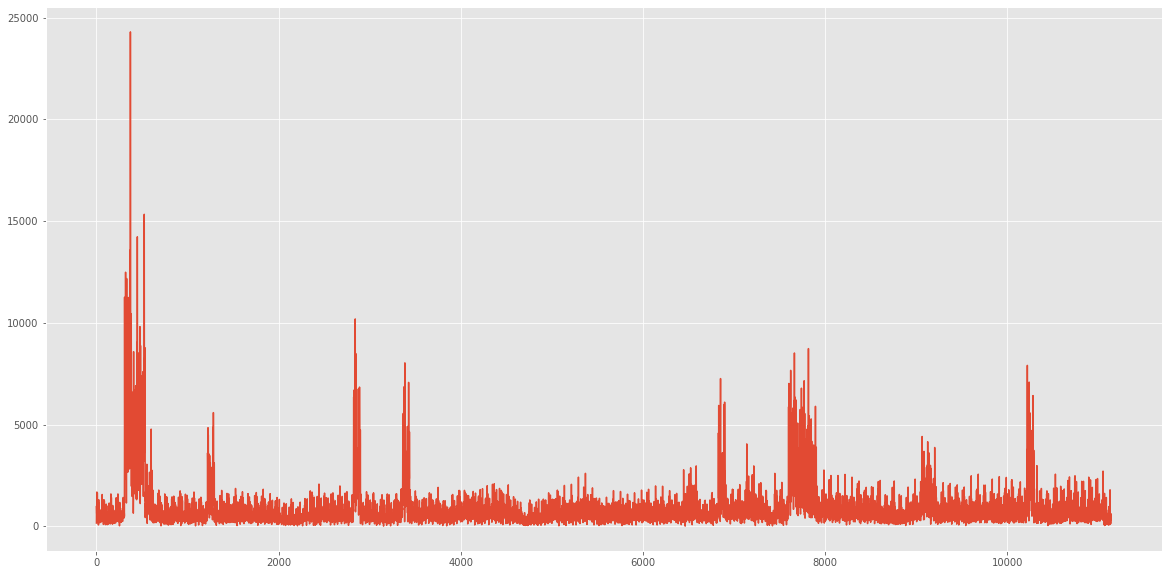

In [93]:
# we will verify correlations between ads and number of orders. in this approach, we need to think ids as categorical variables
train['meal_id'] = train.meal_id.astype('str')
train['emailer_for_promotion'] = train.emailer_for_promotion.astype('bool')
train['homepage_featured'] = train.homepage_featured.astype('bool')

t2290 = train[train.meal_id == '2290'][['meal_id', 'emailer_for_promotion', 'homepage_featured', 'num_orders']]
plt.figure(figsize=(20,10))
plt.plot(range(len(t2290)), t2290.num_orders);
# meal_gb = train[['meal_id', 'checkout_price', 'base_price']].groupby(['week']).agg([p90, np.sum, np.mean])
# week_gb.head()

KeyError: "['emailer_for_promotion' 'homepage_featured' 'num_orders'] not in index"

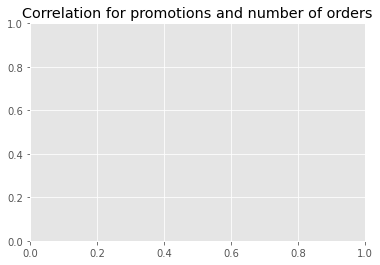

In [82]:
plt.title('Correlation for promotions and number of orders')
sns.heatmap(train[['emailer_for_promotion', 'homepage_featured', 'num_orders']].corr(), fmt='.2f', annot=True, );

In [80]:
train['considered_for_both_promos'] = (train.emailer_for_promotion.astype('bool') & train.homepage_featured.astype('bool'))
train['considered_for_any_promos'] = (train.emailer_for_promotion.astype('bool') | train.homepage_featured.astype('bool'))

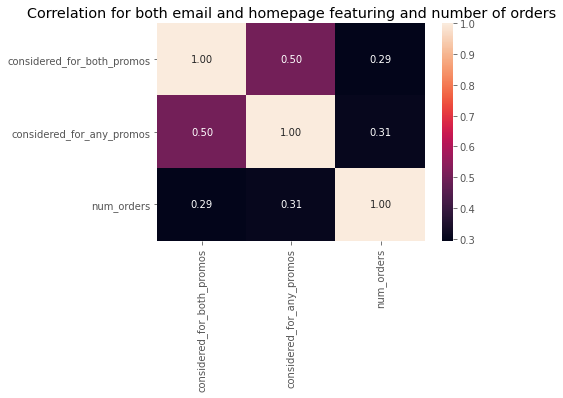

In [81]:
plt.title('Correlation for both email and homepage featuring and number of orders')
sns.heatmap(train[['considered_for_both_promos', 'considered_for_any_promos', 'num_orders']].corr(), fmt='.2f', annot=True, );